In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
#classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
X=df.drop('species',axis=1)
y=df['species']

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
clf=RandomForestClassifier(random_state=42)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred) )
print("\nClassification Report:\n",classification_report(y_test,y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [10]:
#clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit_transform(X_scaled)
df['cluster']=kmeans.labels_

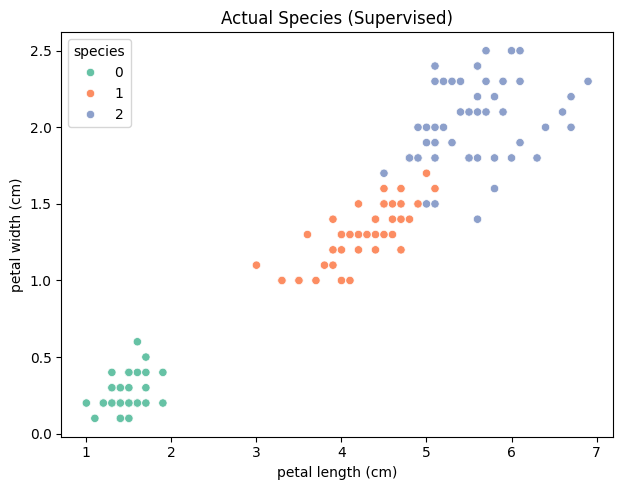

In [11]:
plt.figure(figsize=(12,5))

#Clustering result
plt.subplot(1,2,2)
sns.scatterplot(x=X['petal length (cm)'],y=X['petal width (cm)'],
                hue=df['species'],palette='Set2')
plt.title("Actual Species (Supervised)")

plt.tight_layout()
plt.show()